## Observing the effect of the hidden units
In this part, the effect of including additional hidden units are observed. The experiments involve models:
- ANN with no hidden units, only a linear regressor
- ANN with 2 hidden units
- ANN with 4 hidden units
- ANN with 8 hidden units
- ANN with 16 hidden units
To observe the limits of all of the models, a hyperparameter tuning step has been performed. By this way, the limits of using a fixed amount of hidden units can be observed in terms of expressive power

### Necessary Imports
In addition to implemented files, numpy library is used for easy matrix operations and matplotlib library is used for plotting purposes. *ann.py* and *dataset_setup.py* are files for model implementation and data manipulation respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import *
from dataset_setup import *

### Loading the datasets
As the data files are downloaded in the previous part of the assignment, no additional download has been performed to prevent unnecessarily overriding the dataset files. The following statements load the dataset from the saved files.

In [2]:
file_paths = ['data/train1.txt', 
              'data/test1.txt', 
              'data/train2.txt', 
              'data/test2.txt']
dataset_1 = Dataset(file_paths[0], file_paths[1])
dataset_2 = Dataset(file_paths[2], file_paths[3])

### Helper Functions
Just like in the previous part some helper funtions are implemented for plotting and reporting purposes.

In [3]:
def draw_uniform_samples(data, no_of_samples):
    max_values = np.max(data, axis=0)
    min_values = np.min(data, axis=0)
    dist = np.random.uniform(min_values[0], max_values[0], no_of_samples)
    return dist

In [4]:
def plot_losses(losses):
    epoch_count = len(losses)
    plt.plot(range(1, epoch_count + 1), losses)
    plt.title("Loss vs Epoch Count", fontsize=14)
    plt.ylabel("Loss", fontsize=10)
    plt.xlabel("Epoch", fontsize=10)

In [5]:
def plot_predictions(samples, dist_count, model, title, data_label, loc):
    dist = draw_uniform_samples(samples, dist_count)
    dist = np.reshape(dist, (len(dist), 1))
    y_pred = model.predict(dist)
    sort = list(sorted(zip(dist, y_pred)))
    dist, y_pred = zip(*sort)
    plt.title(title, fontsize=14)
    plt.xlabel("x", fontsize=10)
    plt.ylabel("y", fontsize=10)
    plt.scatter(samples[:, 0], samples[:, 1], label=data_label)
    plt.plot(dist, y_pred, label="Learned model", c="red", lw=2.5)
    plt.legend(loc=loc, borderaxespad=1.0)

In [6]:
def get_loss(data, model):
    labels = data[:, 1]
    samples = data[:, 0]
    samples = np.reshape(samples, (len(samples), 1))
    y_pred = model.predict(samples)
    print("Standard Deviation of loss: {:.4f}".format(np.std(model.loss(labels, y_pred, stage="forward"), axis=0)))
    loss = np.sum(model.loss(labels, y_pred, stage="forward"), axis=0) / len(labels)
    return loss

### Data Normalization
By using the utiities implemented in the *Dataset* class, data normlization has been performed for the experiments to be conducted. 

In [7]:
normalized_train_1, normalized_test_1 = dataset_1.normalize_data()
normalized_train_2, normalized_test_2 = dataset_2.normalize_data()

### Linear Regressor
This part of the notebook shows the limits of the linear regression model on the datasets given. The results are provided for both the first and the second dataset.

#### Results on first dataset
At the initial stage of the experiment, the model has run 5000 epochs and no clue of learning has been observed over all of these epochs. In this experiment it is observed that after an initial drop, the loss values only flunctuate but not able to converge. This fact can also be observed with lesser amount of epochs. Due to that, the number of epochs has been limited to 300, to provide the necessary plots faster when required.<br><br>
Also different hyper-parameters attempted (changing the selection of weights, learning rate etc.) but no imporvement observed.

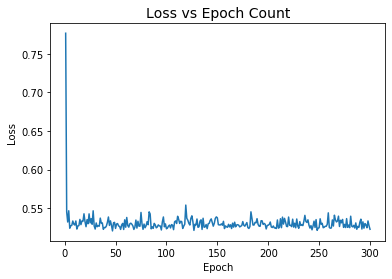

In [8]:
linear_model = ANN(input_dim=1, weight_range=0.0003, hidden_layer_enabled=False)

linear_losses = linear_model.fit(normalized_train_1, 300, learning_rate=0.01, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(linear_losses)

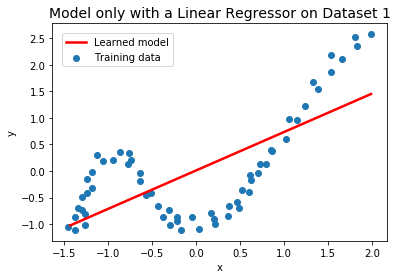

In [9]:
plot_predictions(normalized_train_1, 500, linear_model, "Model only with a Linear Regressor on Dataset 1", "Training data", "upper left")

In [10]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_1, linear_model)))

Standard Deviation of loss: 0.4312
Training Loss: 0.5147


In [11]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_1, linear_model)))

Standard Deviation of loss: 0.4966
Test Loss: 0.5843


#### Results on the second dataset
Following the discussion about the first dataset, the same pattern observed here. Due to that, the training process cutted short. Since the linear regression model underfits the dataset which is simpler in terms of non-linearity from dataset 2, this result is not suprising. As it can be seen from the loss plot, the model is not available to overcome the local minimas using this predictive function. The resulting curve is provided below.

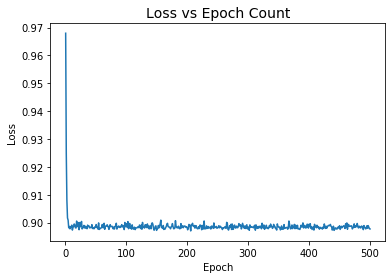

In [12]:
linear_model = ANN(input_dim=1, weight_range=0.0001, hidden_layer_enabled=False)

linear_losses = linear_model.fit(normalized_train_2, 500, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(linear_losses)

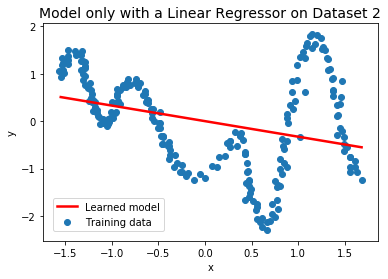

In [13]:
plot_predictions(normalized_train_2, 500, linear_model, "Model only with a Linear Regressor on Dataset 2", "Training data", "lower left")

In [14]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, linear_model)))

Standard Deviation of loss: 1.1876
Training Loss: 0.8954


In [15]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_2, linear_model)))

Standard Deviation of loss: 1.1183
Test Loss: 0.9796


### ANN with a hidden layer having 2 hidden units
As the first step of adding non-linearity to the predictive model, the initial attempt was to add 2 hidden units to see whether this amount of complexity can handle the data distribution. Among the experiments about the number of hidden units, it is expected that with the increased amount of hidden units, the complexity of the learned model will increase.
#### Results for the first dataset
By adding two hidden units, the model is expected to gain some non-linearity. However it seems that this amount of gain is still not enough to fit a good model on it. After the initial experiments, it is observed that the model converges quickly with optimized hyper-parameters. Considering the shape of training loss curve provided below, the model has been trained for 1000 epochs. This amount is selected to show the convergence clearly. After trying out different activation functions, the best result is obtained with sigmoid activation function.

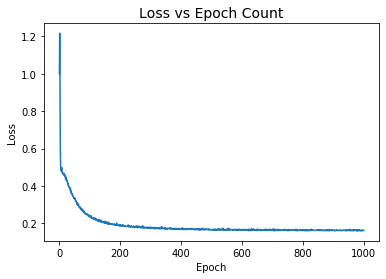

In [16]:
hidden_2_model = ANN(input_dim=1, weight_range=0.001, loss="mse", hidden_layer_enabled=True, hidden_units=2, activation="sigmoid")

hidden_2_losses = hidden_2_model.fit(normalized_train_1, 1000, learning_rate=0.01, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(hidden_2_losses)

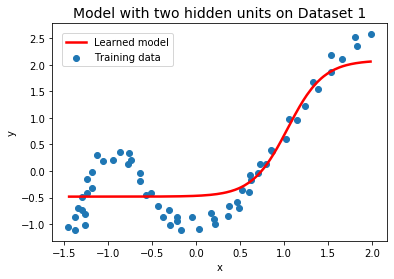

In [17]:
plot_predictions(normalized_train_1, 500, hidden_2_model, "Model with two hidden units on Dataset 1", "Training data", "upper left")

In [18]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_1, hidden_2_model)))

Standard Deviation of loss: 0.1792
Training Loss: 0.1620


In [19]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_1, hidden_2_model)))

Standard Deviation of loss: 0.2756
Test Loss: 0.2038


#### Results for the second dataset
For the second dataset, a hyper-parameter tuning has been performed. As the result of this process, the model converged in 2000 epochs. The resulting loss curve for the training set is given below. Sİnce the loss value is stuck around 0.80 value for normalized data, it is observed that the model with 2 hidden units also underfits the second dataset.

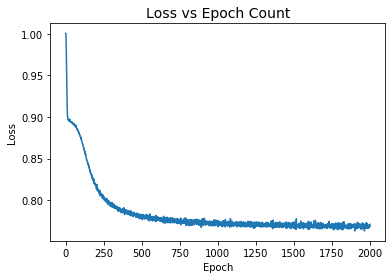

In [20]:
hidden_2_model = ANN(input_dim=1, weight_range=0.0003, loss="mse", hidden_layer_enabled=True, hidden_units=2, activation="tanh")

hidden_2_losses = hidden_2_model.fit(normalized_train_2, 2000, learning_rate=0.0005, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(hidden_2_losses)

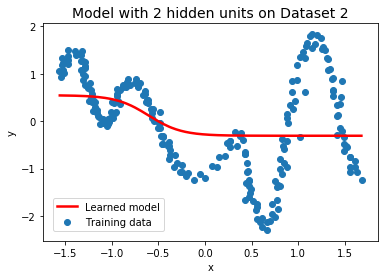

In [21]:
plot_predictions(normalized_train_2, 500, hidden_2_model, "Model with 2 hidden units on Dataset 2", "Training data", "lower left")

In [22]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, hidden_2_model)))

Standard Deviation of loss: 1.0799
Training Loss: 0.7650


In [23]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_2, hidden_2_model)))

Standard Deviation of loss: 1.0252
Test Loss: 0.8294


### ANN with a hidden layer having 4 hidden units
Increasing the complexity of the model, the hidden unit amount is increased to 4 in this experiment. It is expected that the non-linearity and the complexity of the model to increase with this modification. The results are also examined on two datasets here also.
#### Results for the first dataset
In order to find the best model with optimal hyper-parameters, several values are attempted. With the hyperparameters found, the convergence pattern can be achieved around 2000 epochs. The training loss curve is provided below with the learned model. This model shows that the non-linearity of the first dataset can be captured with 4 hidden units

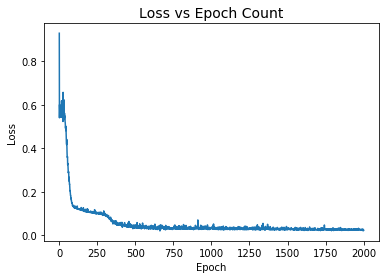

In [24]:
hidden_4_model = ANN(input_dim=1, weight_range=0.0003, loss="mse", hidden_layer_enabled=True, hidden_units=4, activation="tanh")

hidden_4_losses = hidden_4_model.fit(normalized_train_1, 2000, learning_rate=0.01, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(hidden_4_losses)

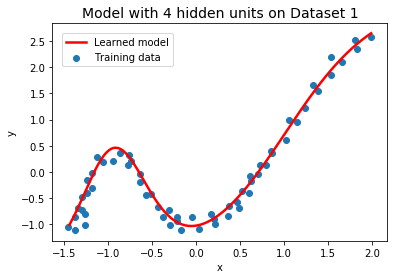

In [25]:
plot_predictions(normalized_train_1, 500, hidden_4_model, "Model with 4 hidden units on Dataset 1", "Training data", "upper left")

In [26]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_1, hidden_4_model)))

Standard Deviation of loss: 0.0541
Training Loss: 0.0254


In [27]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_1, hidden_4_model)))

Standard Deviation of loss: 0.0334
Test Loss: 0.0224


#### Results for the second dataset
Different than the results with the first dataset, even 4 hidden units were not able to capture the non-linearity of the second dataset. The resulting loss curve indicates that with 4 hidden units capturing non-linearity, only some properties of the data distribution can be learned. Due to that, learning starts but the convergence is achieved before being able to fit the optimal non-linear model to the dataset.

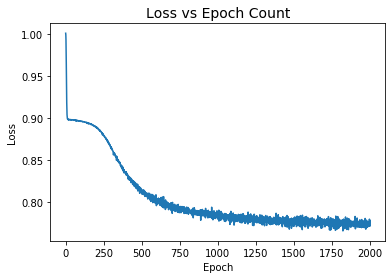

In [28]:
hidden_4_model = ANN(input_dim=1, weight_range=0.001, loss="mse", hidden_layer_enabled=True, hidden_units=4, activation="tanh")

hidden_4_losses = hidden_4_model.fit(normalized_train_2, 2000, learning_rate=0.0005, update="sgd", momentum_enabled=False, alpha=0.3)

plot_losses(hidden_4_losses)

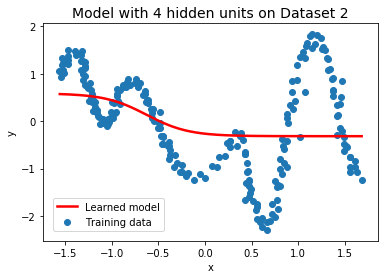

In [29]:
plot_predictions(normalized_train_2, 500, hidden_4_model, "Model with 4 hidden units on Dataset 2", "Training data", "lower left")

In [30]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, hidden_4_model)))

Standard Deviation of loss: 1.0831
Training Loss: 0.7676


In [31]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_2, hidden_4_model)))

Standard Deviation of loss: 1.0287
Test Loss: 0.8348


### ANN with a hidden layer having 8 hidden units
As the unit count where best results for all of the datasets, 8 hidden units are used in the following two models. As it can be observed from the shapes of the loss curves, the both of the trained models achieve convergence at small loss values calculated over an epoch. This result can be observed from both the loss curve and the curve fitted to the data distribution.
#### Results for the first dataset
For the first dataset, 4 hidden units was already enough to fit a good curve to the given dataset. By adding additional 4 hidden units, the performance was not affected either in a good way or a bad way. The loss curve and the predicted models are provided as follows.

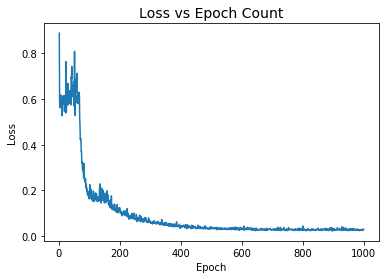

In [32]:
hidden_8_model = ANN(input_dim=1, weight_range=0.0003, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

hidden_8_losses = hidden_8_model.fit(normalized_train_1, 1000, learning_rate=0.01, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(hidden_8_losses)

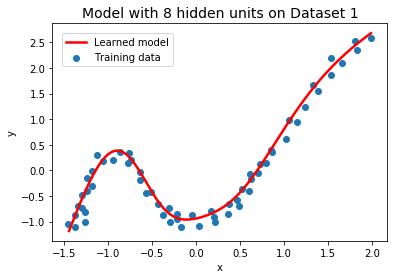

In [33]:
plot_predictions(normalized_train_1, 500, hidden_8_model, "Model with 8 hidden units on Dataset 1", "Training data", "upper left")

In [34]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_1, hidden_8_model)))

Standard Deviation of loss: 0.0480
Training Loss: 0.0256


In [35]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_1, hidden_8_model)))

Standard Deviation of loss: 0.0341
Test Loss: 0.0270


#### Results on the second dataset
Different than the model with 4 hidden units, with 8 units the trained model was able to capture the majority of the non-linearity involved with the second dataset. As a proof of that, the loss curve reaches convergence at a much lower value compared to the previous curves for this dataset. The loss curve and the trained model is shown below.

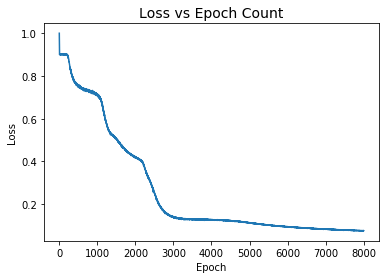

In [36]:
hidden_8_model = ANN(input_dim=1, weight_range=0.003, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

hidden_8_losses = hidden_8_model.fit(normalized_train_2, 8000, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.3)

plot_losses(hidden_8_losses)

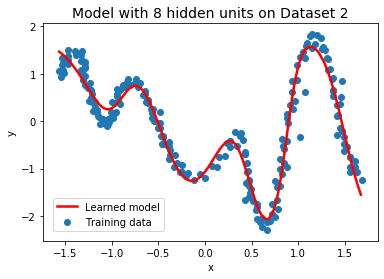

In [37]:
plot_predictions(normalized_train_2, 500, hidden_8_model, "Model with 8 hidden units on Dataset 2", "Training data", "lower left")

In [38]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, hidden_8_model)))

Standard Deviation of loss: 0.2023
Training Loss: 0.0737


In [39]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_2, hidden_8_model)))

Standard Deviation of loss: 0.3249
Test Loss: 0.2017


### ANN with a hidden layer having 16 hidden units
As the final attempt, 16 hidden units has been attempted. Since the non-linearity has already been captured with lower amount of unit, this experiment is done to observe to see that will there be any negative effects of adding aditional hidden units.
#### Results on the first dataset
Considering the results obtained from the previous experiments, there is a small difference between the learned curves that is observable on the first local maximum in the learned model plot. This result is concluded to the initial values of weights and with more epochs it is believed that the optimal curve can be obtained. This judgement has been done considering the shape of the loss curve. The mentioned loss curve and the plot showing the learned distribution are provided below.

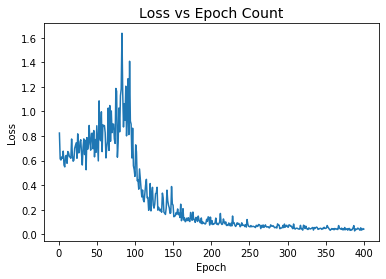

In [40]:
hidden_16_model = ANN(input_dim=1, weight_range=0.0003, loss="mse", hidden_layer_enabled=True, hidden_units=16, activation="tanh")

hidden_16_losses = hidden_16_model.fit(normalized_train_1, 400, learning_rate=0.01, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(hidden_16_losses)

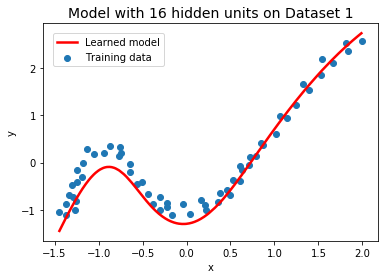

In [41]:
plot_predictions(normalized_train_1, 500, hidden_16_model, "Model with 16 hidden units on Dataset 1", "Training data", "upper left")

In [42]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_1, hidden_16_model)))

Standard Deviation of loss: 0.0953
Training Loss: 0.0749


In [43]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_1, hidden_16_model)))

Standard Deviation of loss: 0.1611
Test Loss: 0.1247


#### Results on the second dataset
Comparing with the model trained with 8 hidden units, the model with 16 hidden units also became successful on learning the data distribution observed in dataset 2. This fact is clearly observed by comparing the loss curves and the learned distributions. Here it is shown that the additional complexity does not harm the model performance but also does not bring any advantage to training. The mentioned plots of the loss and learned distribution are provided below.

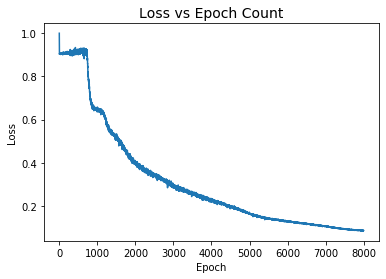

In [44]:
hidden_16_model = ANN(input_dim=1, weight_range=0.0003, loss="mse", hidden_layer_enabled=True, hidden_units=16, activation="tanh")

hidden_16_losses = hidden_16_model.fit(normalized_train_2, 8000, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.1)

plot_losses(hidden_16_losses)

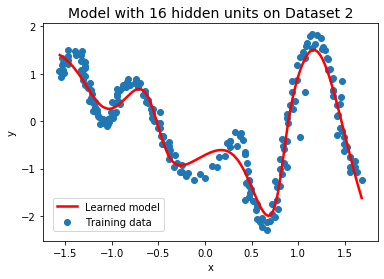

In [45]:
plot_predictions(normalized_train_2, 500, hidden_16_model, "Model with 16 hidden units on Dataset 2", "Training data", "lower left")

In [46]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, hidden_16_model)))

Standard Deviation of loss: 0.1660
Training Loss: 0.0836


In [47]:
print("Test Loss: {:.4f}".format(get_loss(normalized_test_2, hidden_16_model)))

Standard Deviation of loss: 0.3074
Test Loss: 0.2266
